<a href="https://colab.research.google.com/github/rajuiit/VotingEsembleAutismResearch/blob/master/VotingEsembleAutismResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

In [0]:
train=pd.read_csv('gdrive/My Drive/Colab Notebooks/trainfinal.csv')
test=pd.read_csv('gdrive/My Drive/Colab Notebooks/testfinal.csv');

In [0]:
train.head(5)

,ID,Gender,Age,Autism,Family_Member,Can_Play_With,Jaundise,Region,House_Area,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Result
0,1,Female,6.0,1,6,3,Yes,Urban,Medium,3,4,3,3,3,4,3,4,3,2,3.0,4,4,4.0,3.0,4,3.0,4.0,4,4,3,4,4,3,4,4,4,4,3,3,3,4,4.0,4,3.0,4,4,3.0,4,3.0,3,3,4,3,4,3,3,2,4.0,4,4.0,3,3,3,4,4.0,3,4,4,3,2,3,4,3,4,225
1,2,Female,6.0,1,6,3,Yes,Urban,Medium,3,3,4,4,2,4,2,4,3,2,3.0,4,2,4.0,3.0,4,3.0,4.0,3,4,3,4,3,3,4,4,3,4,4,3,3,4,4.0,3,3.0,3,3,4.0,4,4.0,4,3,4,4,3,3,3,3,3.0,3,4.0,4,4,3,4,3.0,4,3,4,4,4,3,4,3,4,223
2,3,Male,5.0,0,3,2,No,Urban,Small,1,1,1,1,1,1,1,1,1,1,1.0,1,1,2.0,1.0,1,1.0,1.0,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1.0,1,1.0,1,1,1.0,1,2.0,1,1,1,1,2,1,1,1,1.0,2,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,70
3,4,Male,7.0,1,3,2,Yes,Urban,Small,3,4,4,4,3,4,3,4,4,3,4.0,4,4,4.0,4.0,3,4.0,4.0,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,4,4,4,4,4,4,4,4,3.0,3,3.0,3,3,3,3,4.0,4,3,3,4,4,4,4,4,3,244
4,5,Male,7.0,1,3,0,Yes,Urban,Small,4,4,4,3,4,4,3,4,4,3,4.0,4,4,4.0,4.0,4,3.0,3.0,4,4,4,4,4,4,4,4,3,4,3,4,4,4,4.0,4,4.0,4,4,3.0,4,3.0,4,4,4,4,4,4,4,4,3.0,4,4.0,4,3,4,4,2.0,4,4,3,4,4,3,4,3,4,244


In [0]:
def bar_chart(feature):
    autism = train[train['Autism']==1][feature].value_counts()
    noautism = train[train['Autism']==0][feature].value_counts()
    df = pd.DataFrame([autism,noautism])
    df.index = ['Autism','No Autism']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

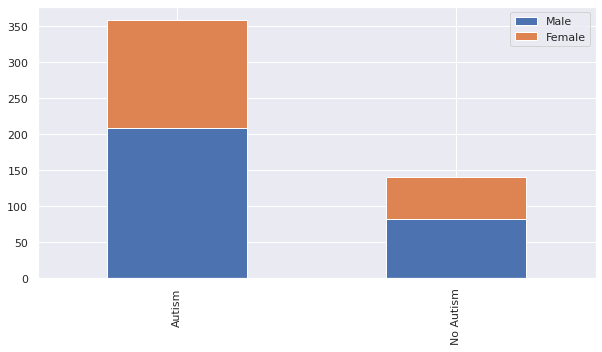

In [0]:
bar_chart('Gender')

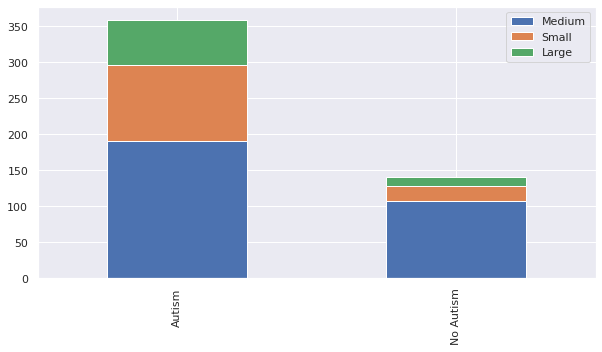

In [0]:
bar_chart('House_Area')

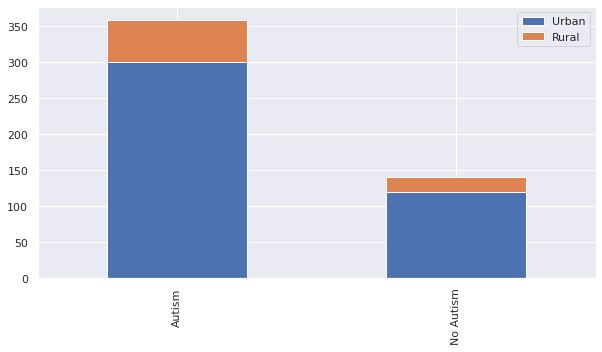

In [0]:
bar_chart('Region')

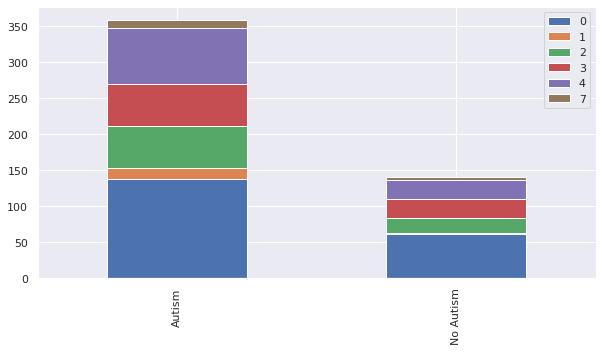

In [0]:
bar_chart('Can_Play_With')

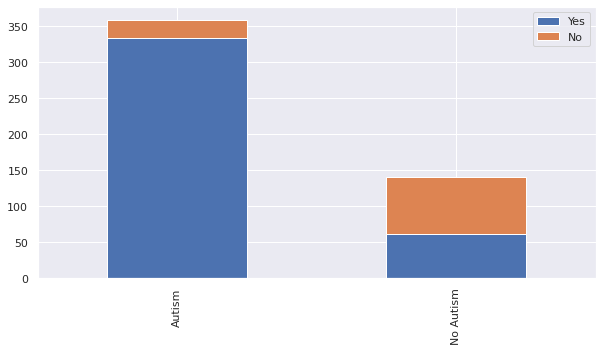

In [0]:
bar_chart('Jaundise')

In [0]:
train_test_data = [train,test]
sex_mapping = {"Male": 0, "Female": 1}
for dataset in train_test_data:
    dataset['Gender'] = dataset['Gender'].map(sex_mapping)

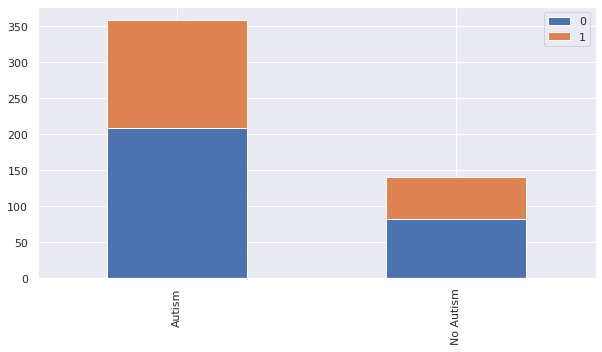

In [0]:
bar_chart('Gender')

In [0]:
train["Age"].fillna(train.groupby("Autism")["Age"].transform("median"), inplace=True)

In [0]:
train.groupby("Autism")["Age"].transform("median")

0      8.0
1      8.0
2      7.0
3      8.0
4      8.0
5      8.0
6      8.0
7      7.0
8      8.0
9      8.0
10     8.0
11     8.0
12     8.0
13     8.0
14     8.0
15     8.0
16     8.0
17     8.0
18     8.0
19     7.0
20     8.0
21     8.0
22     7.0
23     7.0
24     8.0
25     8.0
26     8.0
27     8.0
28     8.0
29     7.0
30     8.0
31     8.0
32     7.0
33     8.0
34     7.0
35     7.0
36     8.0
37     8.0
38     7.0
39     8.0
40     8.0
41     8.0
42     7.0
43     7.0
44     8.0
45     8.0
46     8.0
47     8.0
48     8.0
49     8.0
50     7.0
51     8.0
52     7.0
53     8.0
54     8.0
55     8.0
56     8.0
57     8.0
58     8.0
59     8.0
60     8.0
61     8.0
62     8.0
63     7.0
64     8.0
65     8.0
66     7.0
67     7.0
68     7.0
69     7.0
70     8.0
71     8.0
72     8.0
73     8.0
74     8.0
75     8.0
76     8.0
77     7.0
78     7.0
79     8.0
80     8.0
81     8.0
82     8.0
83     8.0
84     7.0
85     7.0
86     8.0
87     8.0
88     8.0
89     7.0
90     7.0

In [0]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 6, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 6) & (dataset['Age'] <= 12), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 18), 'Age'] = 2

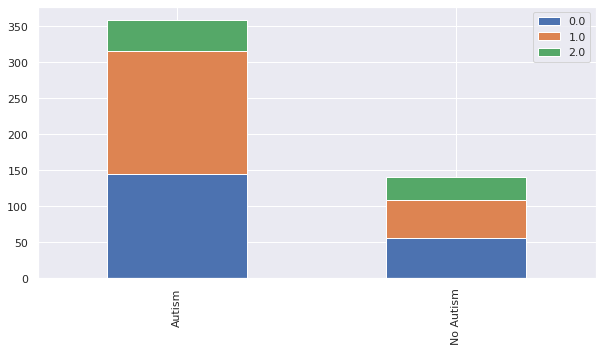

In [0]:
bar_chart('Age')

In [0]:
region_mapping = {"Urban": 0, "Rural": 1}
for dataset in train_test_data:
    dataset['Region'] = dataset['Region'].map(region_mapping)

In [0]:
house_mapping = {"Small": 0, "Medium": 1,"Large": 2}
for dataset in train_test_data:
    dataset['House_Area'] = dataset['House_Area'].map(house_mapping)

In [0]:
jaundise_mapping = {"Yes": 1, "No": 0}
for dataset in train_test_data:
    dataset['Jaundise'] = dataset['Jaundise'].map(jaundise_mapping)

In [0]:

for dataset in train_test_data:
    dataset['Q11'] = dataset['Q11'].fillna(3)

for dataset in train_test_data:
    dataset['Q14'] = dataset['Q14'].fillna(3)


for dataset in train_test_data:
    dataset['Q15'] = dataset['Q15'].fillna(3)

for dataset in train_test_data:
    dataset['Q17'] = dataset['Q17'].fillna(3)

for dataset in train_test_data:
    dataset['Q18'] = dataset['Q18'].fillna(3)

for dataset in train_test_data:
    dataset['Q33'] = dataset['Q33'].fillna(3)

for dataset in train_test_data:
    dataset['Q35'] = dataset['Q35'].fillna(3)

for dataset in train_test_data:
    dataset['Q38'] = dataset['Q38'].fillna(3)

for dataset in train_test_data:
    dataset['Q40'] = dataset['Q40'].fillna(3)

for dataset in train_test_data:
    dataset['Q49'] = dataset['Q49'].fillna(3)

for dataset in train_test_data:
    dataset['Q51'] = dataset['Q51'].fillna(3)

for dataset in train_test_data:
    dataset['Q65'] = dataset['Q65'].fillna(3)

for dataset in train_test_data:
    dataset['Q56'] = dataset['Q56'].fillna(3)

In [0]:

train_data = train.drop('Autism', axis=1)
target = train['Autism']

train_data.shape, target.shape

 

((500, 74), (500,))

In [0]:
train_data .head(500)

,ID,Gender,Age,Family_Member,Can_Play_With,Jaundise,Region,House_Area,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Result
0,1,1,0.0,6,3,1,0,1,3,4,3,3,3,4,3,4,3,2,3.0,4,4,4.0,3.0,4,3.0,4.0,4,4,3,4,4,3,4,4,4,4,3,3,3,4,4.0,4,3.0,4,4,3.0,4,3.0,3,3,4,3,4,3,3,2,4.0,4,4.0,3,3,3,4,4.0,3,4,4,3,2,3,4,3,4,225
1,2,1,0.0,6,3,1,0,1,3,3,4,4,2,4,2,4,3,2,3.0,4,2,4.0,3.0,4,3.0,4.0,3,4,3,4,3,3,4,4,3,4,4,3,3,4,4.0,3,3.0,3,3,4.0,4,4.0,4,3,4,4,3,3,3,3,3.0,3,4.0,4,4,3,4,3.0,4,3,4,4,4,3,4,3,4,223
2,3,0,0.0,3,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1.0,1,1,2.0,1.0,1,1.0,1.0,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1.0,1,1.0,1,1,1.0,1,2.0,1,1,1,1,2,1,1,1,1.0,2,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,70
3,4,0,1.0,3,2,1,0,0,3,4,4,4,3,4,3,4,4,3,4.0,4,4,4.0,4.0,3,4.0,4.0,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,4,4,4,4,4,4,4,4,3.0,3,3.0,3,3,3,3,4.0,4,3,3,4,4,4,4,4,3,244
4,5,0,1.0,3,0,1,0,0,4,4,4,3,4,4,3,4,4,3,4.0,4,4,4.0,4.0,4,3.0,3.0,4,4,4,4,4,4,4,4,3,4,3,4,4,4,4.0,4,4.0,4,4,3.0,4,3.0,4,4,4,4,4,4,4,4,3.0,4,4.0,4,3,4,4,2.0,4,4,3,4,4,3,4,3,4,244
5,6,0,1.0,3,0,1,0,0,4,3,4,4,3,4,3,4,4,3,4.0,4,4,3.0,3.0,4,4.0,4.0,4,4,3,4,4,4,4,4,3,4,4,4,3,4,4.0,4,4.0,4,4,3.0,4,4.0,4,4,3,4,4,4,4,4,4.0,4,3.0,4,3,4,4,4.0,2,4,4,4,3,3,4,4,3,242
6,7,1,0.0,3,4,1,0,0,4,3,4,3,4,3,2,4,3,3,4.0,4,3,4.0,4.0,3,4.0,4.0,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4.0,4,4.0,4,3,3.0,4,4.0,4,4,4,3,4,3,4,4,3.0,4,3.0,4,3,4,4,3.0,4,4,3,4,4,3,4,3,4,239
7,8,1,0.0,3,4,0,0,0,1,1,1,1,1,1,1,1,2,1,2.0,2,1,2.0,1.0,1,1.0,1.0,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1.0,2,1.0,1,1,2.0,1,1.0,1,1,1,1,1,1,1,1,1.0,1,1.0,1,1,1,1,2.0,1,1,1,1,1,1,1,2,1,75
8,9,1,0.0,3,4,1,0,1,3,4,4,4,4,3,4,3,3,4,4.0,2,3,4.0,1.0,2,2.0,3.0,4,1,2,2,4,4,4,3,4,4,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,2,4,4,4,4,3,4,4,4.0,4,4.0,3,4,4,4,4.0,4,3,3,4,2,4,4,4,3,228
9,10,1,0.0,3,4,1,0,1,3,4,1,2,3,4,2,4,3,4,4.0,4,4,4.0,4.0,4,4.0,4.0,4,4,4,2,1,4,3,4,3,4,1,1,2,2,2.0,1,4.0,4,3,1.0,2,4.0,3,4,3,3,4,3,3,4,1.0,2,4.0,3,4,4,3,4.0,3,4,3,4,4,4,3,4,4,207


In [0]:
test_data.head(50)

,Gender,Age,Family_Member,Can_Play_With,Jaundise,Region,House_Area,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Result
0,1,0,6,3,1,0,1,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,221
1,1,0,6,3,1,0,1,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,1,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,1,3,3,3,4,4,3,216
2,0,0,3,2,0,0,0,2,1,1,2,1,3,1,1,2,1,2,1,1,2,1,3,1,1,2,1,3,1,1,2,1,3,1,1,2,1,1,1,1,2,1,2,1,1,2,1,3,1,1,2,1,3,1,1,2,1,3,1,1,2,1,1,1,1,2,1,2,1,1,1,1,95
3,0,0,3,2,1,0,0,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,4,1,4,1,4,3,1,4,4,3,3,194
4,0,0,3,0,1,0,0,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,3,220
5,0,1,3,0,1,0,0,4,3,3,1,4,4,3,3,4,4,4,3,3,4,4,4,3,3,1,4,4,3,3,4,4,4,3,3,4,4,1,3,3,4,4,4,3,3,4,4,4,3,3,1,4,4,3,3,4,4,4,1,3,4,4,4,1,3,4,1,4,1,3,1,4,210
6,1,2,3,4,1,0,0,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,195
7,1,2,3,4,0,0,0,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,91
8,1,1,3,4,0,0,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,143
9,1,1,3,4,1,0,1,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,4,4,1,4,2,3,4,195


In [0]:
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=.20, random_state=0, stratify=target)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print(y_test)

X_train:  (400, 74)
X_test:  (100, 74)
y_train:  (400,)
y_test:  (100,)
499    0
491    1
480    1
114    1
31     1
108    1
289    0
250    1
330    1
292    0
300    1
173    0
285    1
319    0
398    1
313    1
359    1
482    0
24     1
206    1
399    1
172    0
498    1
38     0
142    0
230    1
166    1
144    1
351    1
4      1
373    1
55     1
294    1
93     1
30     1
297    1
15     1
255    1
406    1
110    1
154    1
459    1
382    1
315    1
240    0
270    1
248    1
325    1
316    0
438    1
44     1
415    1
78     0
131    1
391    1
18     1
458    1
411    1
473    0
429    0
128    1
171    1
191    1
367    0
161    1
291    0
280    0
177    1
57     1
151    1
347    1
194    1
298    1
460    1
223    1
117    1
260    1
422    0
92     0
267    0
253    0
136    0
448    1
54     1
209    1
309    1
426    0
488    0
13     1
375    1
139    0
84     0
254    0
153    1
360    1
376    1
216    0
282    1
361    1
455    1
Name: Autism, dtype: int64


In [0]:
#Decision Tree Classifier : Model Evaluation using Confusion Matrix
#model fil & train
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
## for ploting roc_curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

#Confusion Matrix & Measurement
print("DecisionTreeClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Acuracy: ", accuracy_score(y_test, y_pred)*100)
print("Classification Report: ")
print(classification_report(y_test, y_pred))

y_pred_prob_dt = dt.predict_proba(X_test)[:,1]
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)*100;
print("AUC for DTC:", auc_dt)

fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_prob_dt)


avg_precision_score=average_precision_score(y_test, y_pred_prob_dt)*100
print("Average Precision Score:", avg_precision_score)


DecisionTreeClassifier: 
Confustion Matrix: 
[[24  4]
 [ 4 68]]
Acuracy:  92.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.94      0.94      0.94        72

    accuracy                           0.92       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.92      0.92      0.92       100

AUC for DTC: 90.07936507936508
Average Precision Score: 93.19753086419753


In [0]:

#Multinomial Naive Bayes

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_m_pred = nb.predict(X_test)

#Confusion Matrix & Measurement
print("Multinomial Naive Bayes: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_m_pred))
print("Acuracy: ", accuracy_score(y_test, y_m_pred)*100)
print("Classification Report: ",classification_report(y_test, y_m_pred))

y_pred_prob_mnb = nb.predict_proba(X_test)[:,1]
fpr_mnb, tpr_mnb, thresholds = roc_curve(y_test, y_pred_prob_mnb)
auc_mnb=roc_auc_score(y_test, y_pred_prob_mnb)*100
print("AUC for MultinomialNB:", auc_mnb)
avg_precision_mnb=average_precision_score(y_test, y_pred_prob_mnb)*100 
print("Average Precision Score:", avg_precision_mnb)


Multinomial Naive Bayes: 
Confustion Matrix: 
[[19  9]
 [17 55]]
Acuracy:  74.0
Classification Report:                precision    recall  f1-score   support

           0       0.53      0.68      0.59        28
           1       0.86      0.76      0.81        72

    accuracy                           0.74       100
   macro avg       0.69      0.72      0.70       100
weighted avg       0.77      0.74      0.75       100

AUC for MultinomialNB: 83.58134920634922
Average Precision Score: 90.29357282009605


In [0]:
#RandomForestClassifier

rf = RandomForestClassifier(n_estimators=13)
rf.fit(X_train, y_train)
y_random_pred = rf.predict(X_test)

#Confusion Matrix & Measurement
print("RandomForestClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_random_pred))
print("Acuracy: ", accuracy_score(y_test, y_random_pred)*100)
print("Classification Report: ",classification_report(y_test, y_random_pred))

y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_prob_mnb)
auc_rf=roc_auc_score(y_test, y_pred_prob_rf)*100
print("AUC for RandomForestClassifier:", auc_rf)

avg_precision_rf=average_precision_score(y_test, y_pred_prob_rf)*100
print("Average Precision Score:",  avg_precision_rf)

RandomForestClassifier: 
Confustion Matrix: 
[[24  4]
 [ 3 69]]
Acuracy:  93.0
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.95      0.96      0.95        72

    accuracy                           0.93       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.93      0.93      0.93       100

AUC for RandomForestClassifier: 93.52678571428571
Average Precision Score: 95.22665828775044


In [0]:
#SVM
sv = SVC(probability=True)
sv.fit(X_train, y_train)
y_svc_pred = sv.predict(X_test)

#Confusion Matrix & Measurement
print("SVMClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_svc_pred))
print("Acuracy: ", accuracy_score(y_test, y_svc_pred)*100)
print("Classification Report: ",classification_report(y_test, y_svc_pred))

y_pred_prob_svc = sv.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_prob_svc)
auc_svc=roc_auc_score(y_test, y_pred_prob_svc)*100
print("AUC for SVMClassifier:", auc_svc)
avg_precision_svc=average_precision_score(y_test, y_pred_prob_svc)*100
print("Average Precision Score:", avg_precision_svc)

SVMClassifier: 
Confustion Matrix: 
[[24  4]
 [ 0 72]]
Acuracy:  96.0
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.95      1.00      0.97        72

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for SVMClassifier: 94.7420634920635
Average Precision Score: 96.05826701864851


In [0]:
#GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_g_pred = gnb.predict(X_test)

#Confusion Matrix & Measurement
print("GaussianNBClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_g_pred))
print("Acuracy: ", accuracy_score(y_test, y_g_pred)*100)
print("Classification Report: ",classification_report(y_test, y_g_pred))

y_pred_prob_gnb = gnb.predict_proba(X_test)[:,1]
fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, y_pred_prob_gnb)
auc_gnb=roc_auc_score(y_test, y_pred_prob_gnb)*100
print("AUC for GaussianNBClassifier:",auc_gnb )

avg_precision_gnb=average_precision_score(y_test, y_pred_prob_gnb)*100 
print("Average Precision Score:", avg_precision_gnb)

GaussianNBClassifier: 
Confustion Matrix: 
[[24  4]
 [ 0 72]]
Acuracy:  96.0
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.95      1.00      0.97        72

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for GaussianNBClassifier: 92.85714285714286
Average Precision Score: 94.73684210526315


In [0]:
#AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=100)
ada.fit(X_train, y_train)
y_ada_pred = ada.predict(X_test)

#Confusion Matrix & Measurement
print("AdaBoostClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_ada_pred))
print("Acuracy: ", accuracy_score(y_test, y_ada_pred)*100)
print("Classification Report: ")

print(classification_report(y_test, y_ada_pred))

y_pred_prob_ada = ada.predict_proba(X_test)[:,1]
fpr_ada, tpr_ada, thresholds = roc_curve(y_test, y_pred_prob_ada)
auc_ada=roc_auc_score(y_test, y_pred_prob_ada)*100
print("AUC for AdaBoostClassifier:", auc_ada)

avg_precision_ada=average_precision_score(y_test, y_pred_prob_ada)*100
print("Average Precision Score:", avg_precision_ada )

AdaBoostClassifier: 
Confustion Matrix: 
[[23  5]
 [ 2 70]]
Acuracy:  93.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.93      0.97      0.95        72

    accuracy                           0.93       100
   macro avg       0.93      0.90      0.91       100
weighted avg       0.93      0.93      0.93       100

AUC for AdaBoostClassifier: 94.64285714285714
Average Precision Score: 97.0975609984511


In [0]:
#MLPClassifier

ml = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ml.fit(X_train, y_train)
y_ml_pred = ml.predict(X_test)

#Confusion Matrix & Measurement
print("MLPClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_ml_pred))
print("Acuracy: ", accuracy_score(y_test, y_ml_pred)*100)
print("Classification Report: ")

print(classification_report(y_test, y_ml_pred))

y_pred_prob_mlp = ml.predict_proba(X_test)[:,1]
fpr_ml, tpr_ml, thresholds = roc_curve(y_test, y_pred_prob_mlp)
auc_mlp=roc_auc_score(y_test, y_pred_prob_mlp)*100
print("AUC for MLPClassifier:", auc_mlp)

avg_precsion_mlp=average_precision_score(y_test, y_pred_prob_mlp)*100 
print("Average Precision Score:",avg_precsion_mlp)

MLPClassifier: 
Confustion Matrix: 
[[ 0 28]
 [ 0 72]]
Acuracy:  72.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.72      1.00      0.84        72

    accuracy                           0.72       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.52      0.72      0.60       100

AUC for MLPClassifier: 50.0
Average Precision Score: 72.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:

#KNNClassification

KNNClassification = KNeighborsClassifier(n_neighbors=2)
KNNClassification.fit(X_train,y_train)
y_predictionKNN=KNNClassification.predict(X_test)


#Confusion Matrix & Measurement
print("KNNClassification: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_predictionLogistic))
print("Acuracy: ", accuracy_score(y_test, y_predictionKNN)*100)
print("Classification Report: ")

print(classification_report(y_test, y_predictionKNN))

y_pred_prob_knn = KNNClassification.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_prob_knn)
auc_knn=roc_auc_score(y_test, y_pred_prob_knn)*100
print("AUC for KNNClassification:", auc_knn)

avg_precision_knn=average_precision_score(y_test, y_pred_prob_knn)*100

print("Average Precision Score:", avg_precision_knn)

KNNClassification: 
Confustion Matrix: 
[[23  5]
 [ 3 69]]
Acuracy:  95.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.95      0.99      0.97        72

    accuracy                           0.95       100
   macro avg       0.95      0.92      0.94       100
weighted avg       0.95      0.95      0.95       100

AUC for KNNClassification: 92.7579365079365
Average Precision Score: 94.66764132553605


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
#GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators=100)
gbt.fit(X_train, y_train)
y_pred_gbt = gbt.predict(X_test)
#Confusion Matrix & Measurement
print("GradientBoostingClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_pred_gbt))
print("Acuracy: ", accuracy_score(y_test, y_pred_gbt)*100)
print("Classification Report: ")
print(classification_report(y_test, y_pred_gbt))

y_pred_prob_gbt = gbt.predict_proba(X_test)[:,1]
fpr_gbt, tpr_gbt, thresholds = roc_curve(y_test, y_pred_prob_gbt)
auc_gbt=roc_auc_score(y_test, y_pred_prob_gbt)*100
print("AUC for GradientBoostingClassifier:",auc_gbt )
avg_precsion_gbt=average_precision_score(y_test, y_pred_prob_gbt)*100
print("Average Precision Score:", avg_precsion_gbt)

GradientBoostingClassifier: 
Confustion Matrix: 
[[24  4]
 [ 3 69]]
Acuracy:  93.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.95      0.96      0.95        72

    accuracy                           0.93       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.93      0.93      0.93       100

AUC for GradientBoostingClassifier: 95.13888888888889
Average Precision Score: 97.06098161782111


In [0]:
##Building the Function for AUC validation
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test,y_pred,average="macro"):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test=lb.transform(y_test)
    y_pred=lb.transform(y_pred)
    return  metrics.roc_auc_score(y_test,y_pred,average=average)
##Building the Function for AUC validation ends here

In [0]:
## Voting Algo Start
from sklearn import metrics
from sklearn.metrics import auc
print("#####################")
from sklearn.ensemble import VotingClassifier
Voting_Classification = VotingClassifier(estimators=[('descit',dt),('multinomial',nb), ('random', rf),('sv',sv),('gn',gnb),('ada',ada),('mlp',ml),('knn', KNNClassification), ('Gradient', gbt)],voting='soft', weights=[2,1,1,3,1,2,1,0,0])
Voting_Classification.fit(X_train,y_train)

y_predictionVoting=Voting_Classification.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_predictionVoting)*100)
print(metrics.confusion_matrix(y_test,y_predictionVoting))

#aucVoting=multiclass_roc_auc_score(y_test,y_predictionVoting,average="macro")
#aucv=aucVoting*100;
#print("Are under Curve for Voting: ", aucv)
print("Report for Voting: ")
print(metrics.classification_report(y_test,y_predictionVoting))

y_pred_prob_vot = Voting_Classification.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_vot)
auc_vot=roc_auc_score(y_test, y_pred_prob_vot)*100
print("AUC for Esemble:",auc_vot)
#Another way to findout AUC
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_vot)
#auc_vot=auc(fpr, tpr)*100
#print("AUC for Esemble:",auc_vot)
avg_precsion_vot=average_precision_score(y_test, y_pred_prob_vot)*100
print("Average Precision Score:", avg_precsion_vot)
print("#####################")

#####################
Accuracy:  96.0
[[24  4]
 [ 0 72]]
Report for Voting: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.95      1.00      0.97        72

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for Esemble: 95.03968253968254
Average Precision Score: 97.49222718897136
#####################


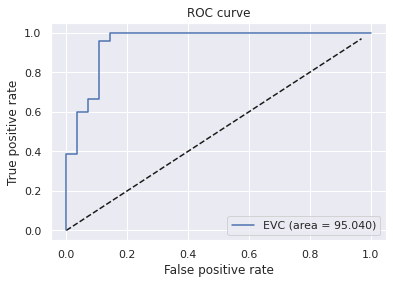

In [0]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1)
plt.plot([0, 0.97], [0, 0.97], 'k--')
plt.plot(fpr, tpr, label='EVC (area = {:.3f})'.format(auc_vot))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

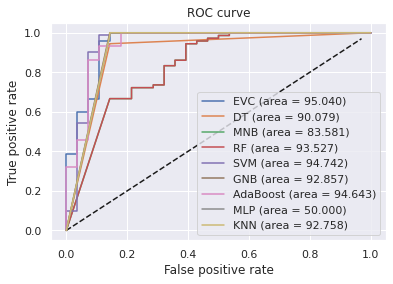

In [390]:
plt.figure(1)
plt.plot([0, 0.97], [0, 0.97], 'k--')
plt.plot(fpr, tpr, label='EVC (area = {:.3f})'.format(auc_vot))
plt.plot(fpr_dt, tpr_dt, label='DT (area = {:.3f})'.format(auc_dt))
plt.plot(fpr_mnb, tpr_mnb, label='MNB (area = {:.3f})'.format(auc_mnb))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_svm, tpr_svm, label='SVM (area = {:.3f})'.format(auc_svc))
plt.plot(fpr_gnb, tpr_gnb, label='GNB (area = {:.3f})'.format(auc_gnb))
plt.plot(fpr_ada, tpr_ada, label='AdaBoost (area = {:.3f})'.format(auc_ada))
plt.plot(fpr_ml, tpr_ml, label='MLP (area = {:.3f})'.format(auc_mlp))
plt.plot(fpr_knn, tpr_knn, label='KNN (area = {:.3f})'.format(auc_knn))
#plt.plot(fpr_gbt, tpr_gbt, label='GBT (area = {:.3f})'.format(auc_gbt))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
